In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tabulate import tabulate

DATA_PATH = Path("experiments/baseline/translationese.jsonl")
records = [json.loads(l) for l in open(DATA_PATH, "r", encoding="utf8")]
len(records)

1994

In [4]:
ppls = np.array([rec["ppl"] for rec in records])
ppls[:10], len(ppls)

(array([ 5.47304395,  6.84990966,  5.55941543,  5.20498757, 13.61227133,
        14.77906357, 34.51629963,  7.64079841,  9.61361436,  8.48750924]),
 1994)

In [13]:
def describe(arr):
    return {
        "mean": float(np.mean(arr)),
        "median": float(np.median(arr)),
        "std": float(np.std(arr)),
        "min": float(np.min(arr)),
        "max": float(np.max(arr)),
        "p90": float(np.percentile(arr, 90)),
        "p95": float(np.percentile(arr, 95)),
        "p99": float(np.percentile(arr, 99)),
    }

ppl_stats = describe(ppls)
headers = ["Metric", "Value"]
rows = [(k, round(v, 2)) for k, v in ppl_stats.items()]

print(tabulate(rows, headers=headers, tablefmt="github"))

| Metric   |   Value |
|----------|---------|
| mean     |   19.39 |
| median   |   11.87 |
| std      |   71.87 |
| min      |    3.39 |
| max      | 2883.04 |
| p90      |   29.88 |
| p95      |   43.44 |
| p99      |  127.84 |


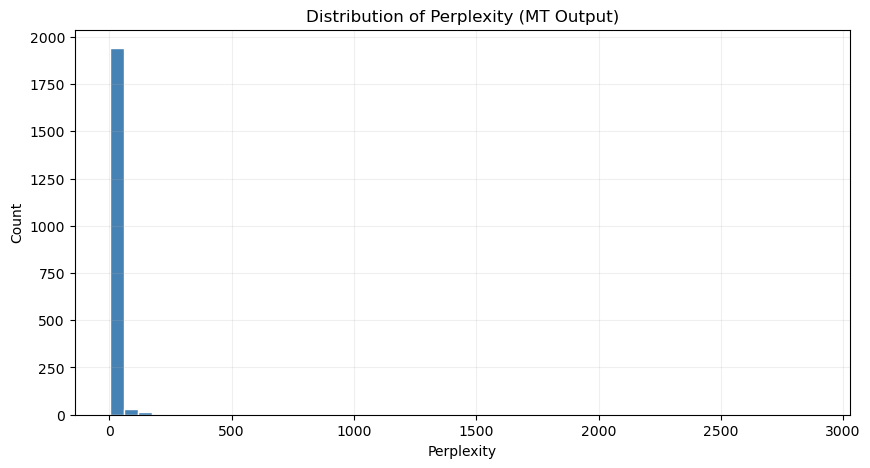

In [6]:
plt.figure(figsize=(10,5))
plt.hist(ppls, bins=50, color="steelblue", edgecolor="white")
plt.title("Distribution of Perplexity (MT Output)")
plt.xlabel("Perplexity")
plt.ylabel("Count")
plt.grid(alpha=0.2)
plt.show()

In [7]:
records_sorted = sorted(records, key=lambda r: r["ppl"], reverse=True)

n = 10
for rec in records_sorted[:n]:
    print("SRC:", rec["src"])
    print("REF:", rec["ref"])
    print("MT :", rec["mt"])
    print("PPL:", rec["ppl"])
    print("-" * 80)

SRC: Yes, Chinatown
REF: Da, Chinatown
MT : Da, Chinoisele
PPL: 2883.038181595625
--------------------------------------------------------------------------------
SRC: Cluster bombs!
REF: Bombe cu dispersie!
MT : Bombelor de rachet!
PPL: 754.1740871449384
--------------------------------------------------------------------------------
SRC: Take a breath.
REF: Respirați adânc.
MT : Suflete!
PPL: 663.9096408299769
--------------------------------------------------------------------------------
SRC: He teaches violin at the Musikhochschule of Sarrebruck, Germany.
REF: Preda cursuri de vioara la Musikhochschule din Sarrebruck, Germania.
MT : El preda la vioară la Muzika Hochschule din Sarrebrück, Germania.
PPL: 444.45252446431573
--------------------------------------------------------------------------------
SRC: LAX-C probably has it.
REF: Probabil că găsiți la LAX-C.
MT : Probabil LAX-C are are de acela.
PPL: 318.2162156888947
------------------------------------------------------------

In [8]:
for rec in records_sorted[-10:]:
    print("SRC:", rec["src"])
    print("REF:", rec["ref"])
    print("MT :", rec["mt"])
    print("PPL:", rec["ppl"])
    print("-" * 80)

SRC: The largest increases were reported in Latvia (7.9%), Romania (7.7%), Bulgaria (6.8%), Estonia (5.5%) and Lithuania (4.3%).
REF: Cele mai mari cresteri au fost raportate în Letonia (7,9%), Romania (7,7%), Bulgaria (6,8%), Estonia (5,5%) și Lituania (4,3%).
MT : Cele mai mari creșteri au fost raportate în Letonia (7,9%), România (7,7%), Bulgaria (6,8%), Estonia (5,5%) și Lituania (4,3%).
PPL: 3.754967334694726
--------------------------------------------------------------------------------
SRC: For some products, such as TVs and washing machines, more than one third of purchases are now done through web stores.
REF: În cazul anumitor produse, cum ar fi televizoarele și mașinile de spălat, mai mult de o treime din achiziții se realizează în prezent prin intermediul magazinelor online.
MT : Pentru anumite produse, cum ar fi televizoarele și mașinile de spălat rufe, mai mult de un sfert dintre cumpărăturile efectuate în prezent sunt făcute prin intermediul magazinelor online.
PPL: 3.6

Correlation between sentence length and PPL: -0.1335853551494939


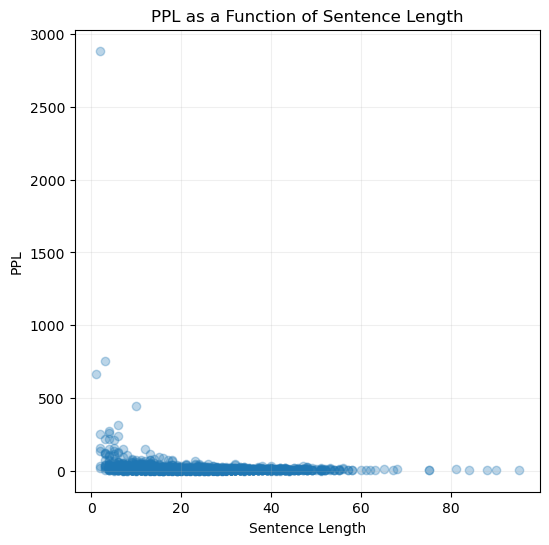

In [10]:
lengths = np.array([len(rec["mt"].split()) for rec in records])
corr = np.corrcoef(lengths, ppls)[0,1]

print("Correlation between sentence length and PPL:", corr)

plt.figure(figsize=(6,6))
plt.scatter(lengths, ppls, alpha=0.3)
plt.xlabel("Sentence Length")
plt.ylabel("PPL")
plt.title("PPL as a Function of Sentence Length")
plt.grid(alpha=0.2)
plt.show()